In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('genus_output.csv')

In [3]:
#Checked off
# Leave N outs decline
# Create bar chart most important variable
# include one example tree(with most important variable first)
# Keep leaving N out up to half dataset

df.head()

df.shape

df.head()

spec_list = ['e', 's']

df = df[df.species.isin(spec_list)]

X = df.drop(['SAMPLE', 'Site', 'species'], axis = 1)
X.head()

column_list = X.columns.values.tolist()


X = X.values


y = df['species']

y = pd.get_dummies(y)

y.rename(columns = {'e':'species'}, inplace = True)

y = y.drop(['s'], axis = 1)
y.head()

y = y.values

0.994281178028328


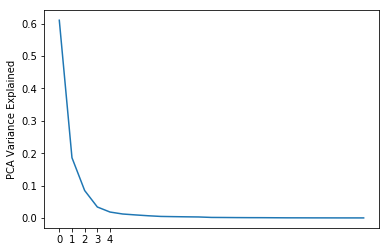

In [4]:
pca = PCA(n_components = 25)
X_pca = pca.fit_transform(X)

print(sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.xticks([0,1,2,3,4])
plt.ylabel("PCA Variance Explained")
plt.show()

In [5]:
##########################
#Grid search for hyper parameters
##########################

In [6]:
c = {'p_out': [], 'accuracy': []}


df2 = pd.DataFrame(columns = ['p_out', 'accuracy'])
df2.head()

import numpy as np
from sklearn.model_selection import LeavePOut


param_list = []

p_num_list = [3]
for j in p_num_list:
    p_num = j
    d = {'TP': [], 'FN': [], 'FP': [], 'TN': []}
    df1 = pd.DataFrame(data=d)
    
    rs = ShuffleSplit(n_splits=150, test_size= float(j/81), random_state=1693)
    rs.get_n_splits(X)
    
    FN_FP_TP_TN = []
    for train_index, test_index in rs.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt_classifier = DecisionTreeClassifier(random_state=1693, max_depth=3, min_samples_leaf=4)
        dt_classifier.fit(X_train, y_train)

        
        
        params =  [{"max_depth":[1,2,3,4,5,6,7,8,9,10], 
            "min_samples_leaf":[1,2,3,4,5,6,10,12,14,16,18,20]  
          }]

        gSearch = GridSearchCV(estimator=dt_classifier,
                       param_grid=params,
                       scoring='accuracy',
                       cv = 2
                      )
        
        
        gSearch_results = gSearch.fit(X_train, y_train)
        
        
        #(gSearch_results)
        
        param_list.append(gSearch_results.best_params_)
        #print(gSearch_results.best_score_)
        
        
        #from sklearn import tree
        #tree_sample = tree.export_graphviz(dt_classifier, out_file = "tree_dt.dot")
        
        temp_list = [0, 0, 0, 0]
        y_pred = dt_classifier.predict(X_test)
        #print(y_pred)
        #print(y_test)
        for i in range(len(y_test)):
            if (y_pred[i]) == 0 and y_test[i][0] == 1:
                temp_list[0] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 0:
                temp_list[1] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 1:
                temp_list[2] += 1
            elif (y_pred[i]) == 0 and y_test[i][0] == 0:
                temp_list[3] += 1
        FN_FP_TP_TN.append(temp_list)
    #print(j)
    #print(FN_FP_TP_TN)
    for i in range(len(FN_FP_TP_TN)):
        df1.loc[len(df1.index)] = FN_FP_TP_TN[i]
    #print(df1.head())
    a = df1.TP.sum()
    b = df1.FN.sum()
    c = df1.FP.sum()
    d = df1.TN.sum()
    #print("Leave", p_num, 'out analysis:')
    #print('')
    #print('|', a, '|', b, '|')
    #print('|', c, '|', d, '|')
    #print('')
    total_accuracy = (a + d)/(a + b + c + d)
    #print('Total accuracy:', total_accuracy)
    #print('Sum:')
    #print(a + b + c + d)
    df2.loc[len(df2.index)] = [p_num, total_accuracy]
    #print('')
    #print(df2.head())
    #print('')
    
#print(param_list)

In [7]:
depth_list = []
leaf_list = []
for i in param_list:
    depth_list.append(i['max_depth'])
    leaf_list.append(i['min_samples_leaf'])
print(sum(depth_list)/len(depth_list))
print(sum(leaf_list)/len(leaf_list))

1.3533333333333333
4.333333333333333


In [8]:
##########################
# Leave N outs decline
##########################

In [9]:
c = {'p_out': [], 'accuracy': []}


df2 = pd.DataFrame(columns = ['p_out', 'accuracy'])
df2.head()

import numpy as np
from sklearn.model_selection import LeavePOut
genus_total_list = []
p_num_list = list(range(1,41))
#p_num_list = [5,10,20,30,40]
#p_num_list = [40]
for j in p_num_list:
    p_num = j
    d = {'TP': [], 'FN': [], 'FP': [], 'TN': []}
    df1 = pd.DataFrame(data=d)
    
    rs = ShuffleSplit(n_splits=1000, test_size= float(j/81), random_state=1693)
    rs.get_n_splits(X)
    
    FN_FP_TP_TN = []
    for train_index, test_index in rs.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt_classifier = DecisionTreeClassifier(random_state=1693, max_depth=3, min_samples_leaf=4)
        dt_classifier.fit(X_train, y_train)
        
        #counter = 0
        #for i in dt_classifier.feature_importances_:
        #    if i != 0:
        #        genus_total_list.append(counter)
        #    counter += 1
        
        ### Chunk containing info on most important Genuses
        dt_list = list(dt_classifier.feature_importances_)
        genus_total_list.append(dt_list.index(max(dt_list)))
        
        #if dt_list.index(max(dt_list)) == 499:
            #print('here')
        #    tree.export_graphviz(dt_classifier, out_file = "tree_dt1.dot")

        ###
        
        '''
        params =  [{"max_depth":[1,2,3,4,5,6,7,8,9,10], 
            "min_samples_leaf":[1,2,3,4,5,6,10,12,14,16,18,20]  
          }]

        gSearch = GridSearchCV(estimator=dt_classifier,
                       param_grid=params,
                       scoring='accuracy',
                       cv=10 
                      )
        
        
        gSearch_results = gSearch.fit(X_train, y_train)
        
        
        #(gSearch_results)
        #print(gSearch_results.best_params_)
        #print(gSearch_results.best_score_)
        '''
        
        #from sklearn import tree
        #tree_sample = tree.export_graphviz(dt_classifier, out_file = "tree_dt.dot")
        
        temp_list = [0, 0, 0, 0]
        y_pred = dt_classifier.predict(X_test)
        #print(y_pred)
        #print(y_test)
        for i in range(len(y_test)):
            if (y_pred[i]) == 0 and y_test[i][0] == 1:
                temp_list[0] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 0:
                temp_list[1] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 1:
                temp_list[2] += 1
            elif (y_pred[i]) == 0 and y_test[i][0] == 0:
                temp_list[3] += 1
        FN_FP_TP_TN.append(temp_list)
    print(j)
    #print(FN_FP_TP_TN)
    for i in range(len(FN_FP_TP_TN)):
        df1.loc[len(df1.index)] = FN_FP_TP_TN[i]
    #print(df1.head())
    a = df1.TP.sum()
    b = df1.FN.sum()
    c = df1.FP.sum()
    d = df1.TN.sum()
    #print("Leave", p_num, 'out analysis:')
    #print('')
    #print('|', a, '|', b, '|')
    #print('|', c, '|', d, '|')
    #print('')
    total_accuracy = (a + d)/(a + b + c + d)
    #print('Total accuracy:', total_accuracy)
    #print('Sum:')
    #print(a + b + c + d)
    df2.loc[len(df2.index)] = [p_num, total_accuracy]
    #print('')
    #print(df2.head())
    #print('')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


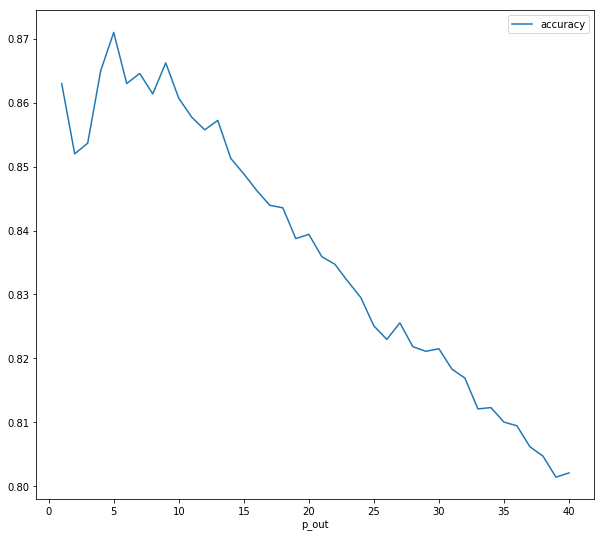

In [10]:
df2.plot(x="p_out", y=["accuracy"], kind="line", figsize=(10, 9))

In [11]:
###########################
# Include one example tree(with most important variable first)
# Tree saved as tree_dt.dot 
# Full tree available on 
###########################

In [12]:
c = {'p_out': [], 'accuracy': []}

df2 = pd.DataFrame(columns = ['p_out', 'accuracy'])
df2.head()

import numpy as np
from sklearn.model_selection import LeavePOut
genus_total_list = []
#p_num_list = list(range(1,41))
#p_num_list = [5,10,20,30,40]
p_num_list = [41]
for j in p_num_list:
    p_num = j
    d = {'TP': [], 'FN': [], 'FP': [], 'TN': []}
    df1 = pd.DataFrame(data=d)
    
    rs = ShuffleSplit(n_splits=1000, test_size= float(j/81), random_state=1693)
    rs.get_n_splits(X)
    
    FN_FP_TP_TN = []
    for train_index, test_index in rs.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt_classifier = DecisionTreeClassifier(random_state=1693, max_depth=3, min_samples_leaf=4)
        dt_classifier.fit(X_train, y_train)
                
        ### Chunk containing info on most important Genuses
        dt_list = list(dt_classifier.feature_importances_)
        genus_total_list.append(dt_list.index(max(dt_list)))
        
        ### Saves a DT tree
        if dt_list.index(max(dt_list)) == 499:
            #print('here')
            tree.export_graphviz(dt_classifier, out_file = "tree_dt.dot")


        
        temp_list = [0, 0, 0, 0]
        y_pred = dt_classifier.predict(X_test)
        for i in range(len(y_test)):
            if (y_pred[i]) == 0 and y_test[i][0] == 1:
                temp_list[0] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 0:
                temp_list[1] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 1:
                temp_list[2] += 1
            elif (y_pred[i]) == 0 and y_test[i][0] == 0:
                temp_list[3] += 1
        FN_FP_TP_TN.append(temp_list)
    #print(j)
    for i in range(len(FN_FP_TP_TN)):
        df1.loc[len(df1.index)] = FN_FP_TP_TN[i]

    a = df1.TP.sum()
    b = df1.FN.sum()
    c = df1.FP.sum()
    d = df1.TN.sum()

    total_accuracy = (a + d)/(a + b + c + d)

    df2.loc[len(df2.index)] = [p_num, total_accuracy]

In [13]:
# Genera found in sample tree 
#499, 161
print((column_list[499].split("|"))[-1:][0])
print((column_list[161].split("|"))[-1:][0])

Marinicaulis
Promicromonospora


In [ ]:
########################################
# Leave N out and produce bacteria genera bar graph
########################################

In [116]:
c = {'p_out': [], 'accuracy': []}


df2 = pd.DataFrame(columns = ['p_out', 'accuracy'])
df2.head()

import numpy as np
from sklearn.model_selection import LeavePOut
genus_total_list = []

p_num_list = [40]
for j in p_num_list:
    p_num = j
    d = {'TP': [], 'FN': [], 'FP': [], 'TN': []}
    df1 = pd.DataFrame(data=d)
    
    rs = ShuffleSplit(n_splits=10000, test_size= float(j/81), random_state=1693)
    rs.get_n_splits(X)
    
    FN_FP_TP_TN = []
    for train_index, test_index in rs.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt_classifier = DecisionTreeClassifier(random_state=1693, max_depth=3, min_samples_leaf=4)
        dt_classifier.fit(X_train, y_train)
        
        
        ### Chunk containing info on most important Genuses
        dt_list = list(dt_classifier.feature_importances_)
        genus_total_list.append(dt_list.index(max(dt_list)))
        

        temp_list = [0, 0, 0, 0]
        y_pred = dt_classifier.predict(X_test)

        for i in range(len(y_test)):
            if (y_pred[i]) == 0 and y_test[i][0] == 1:
                temp_list[0] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 0:
                temp_list[1] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 1:
                temp_list[2] += 1
            elif (y_pred[i]) == 0 and y_test[i][0] == 0:
                temp_list[3] += 1
        FN_FP_TP_TN.append(temp_list)
    print(j)
    #print(FN_FP_TP_TN)
    for i in range(len(FN_FP_TP_TN)):
        df1.loc[len(df1.index)] = FN_FP_TP_TN[i]
    #print(df1.head())
    a = df1.TP.sum()
    b = df1.FN.sum()
    c = df1.FP.sum()
    d = df1.TN.sum()
    #print("Leave", p_num, 'out analysis:')
    #print('')
    #print('|', a, '|', b, '|')
    #print('|', c, '|', d, '|')
    #print('')
    total_accuracy = (a + d)/(a + b + c + d)
    #print('Total accuracy:', total_accuracy)
    #print('Sum:')
    #print(a + b + c + d)
    df2.loc[len(df2.index)] = [p_num, total_accuracy]
    #print('')
    #print(df2.head())
    #print('')

40


In [117]:
print(len(genus_total_list))

10000


46
49


<BarContainer object of 5 artists>

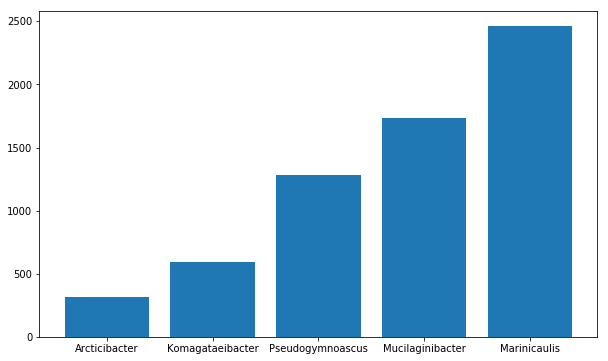

In [123]:
unique_genera = []
for item in genus_total_list:
    if item not in unique_genera:
        unique_genera.append(item)

genera_count= list(range(len(unique_genera)))
for i in range(len(unique_genera)):
    genera_count[i] = genus_total_list.count(unique_genera[i])
    
max_list = sorted(genera_count[:-10])
final_max = (max_list[-10:])
#print(final_max) 

X_list = []
y_list = []
for i in final_max:
    X_list.append(str(unique_genera[genera_count.index(i)]))
    y_list.append(i)

for i in range(len(genera_count)):
    if genera_count[i] == 23:
        print(i)

#X_list[1] = str(unique_genera[82])

#print(X_list)
#print(y_list)

genus_list = []
for i in X_list:
    genus_list.append(column_list[int(i)])

final_genus_list = []
for i in genus_list:
    final_genus_list.append((i.split("|"))[-1:][0])
    #print(i)
    #print(genus)
#print(final_genus_list)

fig= plt.figure(figsize=(10,6))
plt.bar(final_genus_list[-5:], y_list[-5:])

In [ ]:
######################
#Create distribution graph of a accuracy of each model
######################

In [103]:
c = {'p_out': [], 'accuracy': []}


df2 = pd.DataFrame(columns = ['p_out', 'accuracy'])
df2.head()

import numpy as np
from sklearn.model_selection import LeavePOut
#genus_total_list = []

p_num_list = [20]
for j in p_num_list:
    p_num = j
    d = {'TP': [], 'FN': [], 'FP': [], 'TN': []}
    df1 = pd.DataFrame(data=d)
    
    rs = ShuffleSplit(n_splits=10000, test_size= float(j/81), random_state=1693)
    rs.get_n_splits(X)
    
    FN_FP_TP_TN = []
    for train_index, test_index in rs.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt_classifier = DecisionTreeClassifier(random_state=1693, max_depth=3, min_samples_leaf=4)
        dt_classifier.fit(X_train, y_train)
        
        
        ### Chunk containing info on most important Genuses
        #dt_list = list(dt_classifier.feature_importances_)
        #genus_total_list.append(dt_list.index(max(dt_list)))
        

        temp_list = [0, 0, 0, 0]
        y_pred = dt_classifier.predict(X_test)

        for i in range(len(y_test)):
            if (y_pred[i]) == 0 and y_test[i][0] == 1:
                temp_list[0] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 0:
                temp_list[1] += 1
            elif (y_pred[i]) == 1 and y_test[i][0] == 1:
                temp_list[2] += 1
            elif (y_pred[i]) == 0 and y_test[i][0] == 0:
                temp_list[3] += 1
        FN_FP_TP_TN.append(temp_list)
    print(j)
    #print(FN_FP_TP_TN)
    for i in range(len(FN_FP_TP_TN)):
        df1.loc[len(df1.index)] = FN_FP_TP_TN[i]
    #print(df1.head())
    a = df1.TP.sum()
    b = df1.FN.sum()
    c = df1.FP.sum()
    d = df1.TN.sum()
    #print("Leave", p_num, 'out analysis:')
    #print('')
    #print('|', a, '|', b, '|')
    #print('|', c, '|', d, '|')
    #print('')
    total_accuracy = (a + d)/(a + b + c + d)
    #print('Total accuracy:', total_accuracy)
    #print('Sum:')
    #print(a + b + c + d)
    df2.loc[len(df2.index)] = [p_num, total_accuracy]
    #print('')
    print(df2.head())
    #print('')

20
   p_out  accuracy
0   20.0  0.836835


In [1]:
# Barchart displaying variance in Leave N out for 20
x = np.linspace(0, 1, 21)
x_list = []
for l in range(len(x)):
    x_list.append(str(round(x[l],2)))
bar_list = [None] * 21
for b in range(len(bar_list)):
    bar_list[b] = 0
for i, row in df1.iterrows():
    bar_list[int(row['TN'] + row['TP'])] += 1

#print(x_list)
fig= plt.figure(figsize=(9,6))
plt.bar(x_list, bar_list)


NameError: name 'np' is not defined